In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

Read in the data and evaluate what needs to be cleaned

In [2]:
vis1920_i = pd.read_excel('../Data/Vis1920.xlsx')

In [3]:
vis1920_i.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,ACTIVITIES>>,NaN,REST,INN ROOMS,NaN,NaN,CABINS,NaN,NaN,GROUPCAMPS/LODGING,...,TOTAL,CAMPSITES,NaN,NaN,MARINAS,NaN,NaN,NaN,PROGRAMMING,NaN
1,PARKS,VISITORS,GUESTS,AVAIL,SOLD,OCCUP,AVAIL,SOLD,OCCUP,GUESTS,...,GOLFERS,AVAIL,SOLD,OCCUP,AVAIL,SOLD,OCCUP,SWIMMING,HELD,ATTEND
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BICENTENNIAL CAPITOL MALL,39353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,3114
4,BIG CYPRESS TREE,1690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


Pulled the multi-index header code from the UN_GDP project to remove the "Unnamed" header row and make rows at index 0 and 1 the headers.

In [4]:
vis1920= pd.read_excel('../Data/Vis1920.xlsx',skiprows = 1, header=[0,1], sheet_name = 0)
vis1819= pd.read_excel('../Data/Vis1819.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1718= pd.read_excel('../Data/Vis1718.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1617= pd.read_excel('../Data/Vis1617.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1516= pd.read_excel('../Data/Vis1516.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1415= pd.read_excel('../Data/Vis1415.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)
vis1314= pd.read_excel('../Data/Vis1314.xlsx',skiprows = 1, header=[0, 1], sheet_name = 0)

In [5]:
#vis1920.info()

In [6]:
#vis1920

Multi-index header works. Now I need to trim the data frame. The data set includes a total row which would throw off my plots so that needs to be trimmed. My initial review will only be for overall visitor totals for 13/14-19/20. Once I see which parks have the most/least attendance I will review how much of a role lodging and marina access play in the visitation numbers. Then compare the park attendance trends to Tennessee's population change for the same time period.


In [7]:
#Trimmed dataframe
vis1920_c = vis1920[['ACTIVITIES>>']]
vis1920_c = vis1920_c.drop([56,57])
#Used droplevel to clean my header 
#df.columns = df.columns.droplevel()
vis1920_c.columns = vis1920_c.columns.droplevel()
#Updated Visitor datatype from float to int

vis1920_c['VISITORS'] = pd.to_numeric(vis1920_c['VISITORS'], errors ='coerce').astype('Int64')
#vis1920_c
#Sorted values for clear plotting
# #df.sort_values(by=['col1'])
vis1920_s = vis1920_c.sort_values(['VISITORS'])
#Renamed columns for clarity during merges
vis1920_y =vis1920_s.rename(columns={'PARKS':'Park','VISITORS':'2019/2020'})
#Considered adding a year column and concating data 
#vis1920_y = vis1920_y.assign(Year='2019/2020')
vis1920_y

,Park,2019/2020
1,BIG CYPRESS TREE,1690
9,CORDELL HULL BIRTHPLACE,3000
27,JOHNSONVILLE,3914
47,ROCKY FORK,4207
40,PINSON MOUNDS,7742
49,SEVEN ISLANDS,8250
12,CUMBERLAND TRAILS,11064
2,BIG HILL POND,12680
21,FROZEN HEAD,12987
34,NORRIS DAM,15879


Plot 2019/2020 to review the changes then repeat for the remaining files.

In [8]:
#DataFrame.plot.bar(x=None, y=None, **kwargs)[source]
#vis1920_y.plot.barh( x = 'Park',figsize=(10,20))


Repeat dataframe editting methods and merge dataframes

In [9]:
vis1819_c = vis1819[['ACTIVITIES>>']]
vis1819_c = vis1819_c[:-2]
vis1819_c.columns = vis1819_c.columns.droplevel()
vis1819_c['VISITORS'] = pd.to_numeric(vis1819_c['VISITORS'], errors ='coerce').astype('Int64')
vis1819_s = vis1819_c.sort_values(by=['VISITORS'])
vis1819_y =vis1819_s.rename(columns={'PARKS':'Park','VISITORS':'2018/2019'})

#vis1819_y

<AxesSubplot:ylabel='Park'>

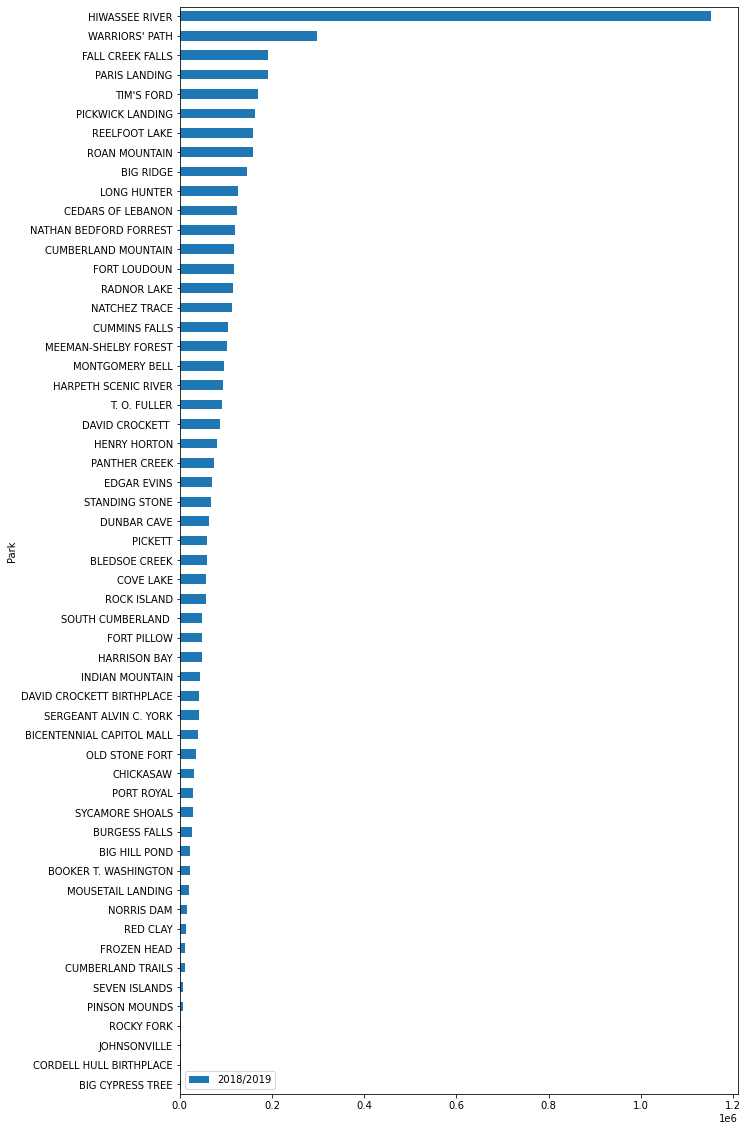

In [10]:
vis1819_y.plot.barh( x = 'Park',figsize=(10,20))

In [11]:
merged = pd.merge(vis1920_y, vis1819_y, on="Park")
merged

,Park,2019/2020,2018/2019
0,BIG CYPRESS TREE,1690,2238
1,CORDELL HULL BIRTHPLACE,3000,2805
2,JOHNSONVILLE,3914,3344
3,ROCKY FORK,4207,3603
4,PINSON MOUNDS,7742,6958
5,SEVEN ISLANDS,8250,7181
6,CUMBERLAND TRAILS,11064,11420
7,BIG HILL POND,12680,22944
8,FROZEN HEAD,12987,11762
9,NORRIS DAM,15879,14718


In [12]:
# merged.plot.barh( x= 'Park', figsize=(10,10))

In [13]:
vis1718_c = vis1718[['ACTIVITIES>>']]
vis1718_c = vis1718_c[:-2]
vis1718_c.columns = vis1718_c.columns.droplevel()
vis1718_c['VISITORS'] = pd.to_numeric(vis1718_c['VISITORS'], errors ='coerce').astype('Int64')
vis1718_s = vis1718_c.sort_values(by=['VISITORS'])
vis1718_y = vis1718_s.rename(columns={'PARKS':'Park','VISITORS':'2017/2018'})
# vis1718_y

In [14]:
vis1617_c = vis1617[['ACTIVITIES>>']]
vis1617_c = vis1617_c[:-2]
vis1617_c.columns = vis1617_c.columns.droplevel()
vis1617_c['VISITORS'] = pd.to_numeric(vis1617_c['VISITORS'], errors ='coerce').astype('Int64')
vis1617_s = vis1617_c.sort_values(by=['VISITORS'])
vis1617_y = vis1617_s.rename(columns={'PARKS':'Park','VISITORS':'2016/2017'})
#vis1617_y

In [15]:
vis1516_c = vis1516[['ACTIVITIES>>']]
vis1516_c = vis1516_c[:-2]
vis1516_c.columns = vis1516_c.columns.droplevel()
vis1516_c['VISITORS'] = pd.to_numeric(vis1516_c['VISITORS'], errors ='coerce').astype('Int64')
vis1516_s = vis1516_c.sort_values(by=['VISITORS'])
vis1516_y = vis1516_s.rename(columns={'PARKS':'Park','VISITORS':'2015/2016'})
# vis1516_y

In [16]:
vis1415_c = vis1415[['ACTIVITIES>>']]
vis1415_c = vis1415_c[:-2]
vis1415_c.columns = vis1415_c.columns.droplevel()
vis1415_c['VISITORS'] = pd.to_numeric(vis1415_c['VISITORS'], errors ='coerce').astype('Int64')
vis1415_s = vis1415_c.sort_values(by=['VISITORS'])
vis1415_y =vis1415_s.rename(columns={'PARKS':'Park','VISITORS':'2014/2015'})
# vis1415_y

In [17]:
vis1314_c = vis1314[['ACTIVITIES>>']]
vis1314_c = vis1314_c[:-2]
vis1314_c.columns = vis1314_c.columns.droplevel()
vis1314_c['VISITORS'] = pd.to_numeric(vis1314_c['VISITORS'], errors ='coerce').astype('Int64')
#vis1314_c = vis1314_c.astype({'VISITORS': 'int32'})
vis1314_s = vis1314_c.sort_values(by=['VISITORS'])
vis1314_y =vis1314_s.rename(columns={'PARKS':'Park','VISITORS':'2013/2014'})
# vis1314_y

Merge the dataframes together

In [18]:
dataframes = [vis1920_y,vis1819_y,vis1718_y,vis1617_y,vis1516_y, vis1415_y, vis1314_y]

years_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Park'],
                                            how='outer'), dataframes)

# if you want to fill the values that don't exist in the lines of merged dataframe simply fill with required strings as

# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
#                                             how='outer'), data_frames).fillna('void')

In [19]:
years_merged

,Park,2019/2020,2018/2019,2017/2018,2016/2017,2015/2016,2014/2015,2013/2014
0,BIG CYPRESS TREE,1690,2238,1986,846,892,1426,1346
1,CORDELL HULL BIRTHPLACE,3000,2805,7727,8534,7798,6950,5667
2,JOHNSONVILLE,3914,3344,1977,2198,5019,5556,8733
3,ROCKY FORK,4207,3603,<NA>,<NA>,<NA>,<NA>,<NA>
4,PINSON MOUNDS,7742,6958,6579,6370,7746,6617,8397
5,SEVEN ISLANDS,8250,7181,6188,11381,3975,<NA>,<NA>
6,CUMBERLAND TRAILS,11064,11420,10563,11201,12497,17010,16257
7,BIG HILL POND,12680,22944,6785,14790,13756,11992,15920
8,FROZEN HEAD,12987,11762,15234,14954,14690,15861,14149
9,NORRIS DAM,15879,14718,14470,16600,14380,13147,11696


In [20]:
# years_merged.set_index('Park')


In [21]:
# years_merged.plot.barh(x= 'Park',figsize=(10,20))

In [22]:
# df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

In [23]:
# df_merged_t = df_merged.T
# df_merged_t
# df_merged.set_index('Park').transpose()

In [24]:
# filenames = ['../Data/Vis1920.xlsx',\
#              '../Data/Vis1819.xlsx',\
#              '../Data/Vis1718.xlsx',\
#              '../Data/Vis1617.xlsx',\
#              '../Data/Vis1516.xlsx',\
#             '../Data/Vis1819.xlsx']
# dataframes = pd.read_excel((f) for f in filenames)

In [25]:
# from glob import glob
# filenames = glob('../Data/Vis1*.xlsx')
# dataframes = pd.read_excel(f) for f in filenames
#vis1718['VISITORS'] = pd.to_numeric(vis1718['VISITORS'], errors='coerce')
#vis1718 = vis1718.dropna(subset=['VISITORS'])